<a href="https://colab.research.google.com/github/prat555/Python_Tutorials/blob/main/Pattern_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gaussian Parameter Estimation: Custom vs NumPy**

GAUSSIAN DISTRIBUTION PARAMETER ESTIMATION

True Parameters:
  Mean (μ): 5.0
  Std Dev (σ): 2.0
  Variance (σ²): 4.0

Sample Size: 1000

------------------------------------------------------------
CUSTOM IMPLEMENTATION
------------------------------------------------------------

Estimated Mean: 5.038664
  Error: 0.038664

Estimated Variance (MLE, ddof=0): 3.831620
  Error: 0.168380

Estimated Variance (Unbiased, ddof=1): 3.835455
  Error: 0.164545

Estimated Std Dev (MLE, ddof=0): 1.957452
  Error: 0.042548

Estimated Std Dev (Unbiased, ddof=1): 1.958432
  Error: 0.041568

------------------------------------------------------------
NUMPY IMPLEMENTATION
------------------------------------------------------------

Estimated Mean: 5.038664
  Error: 0.038664

Estimated Variance (MLE, ddof=0): 3.831620
  Error: 0.168380

Estimated Variance (Unbiased, ddof=1): 3.835455
  Error: 0.164545

Estimated Std Dev (MLE, ddof=0): 1.957452
  Error: 0.042548

Estimated Std Dev (Unbiased, ddof=1): 1.

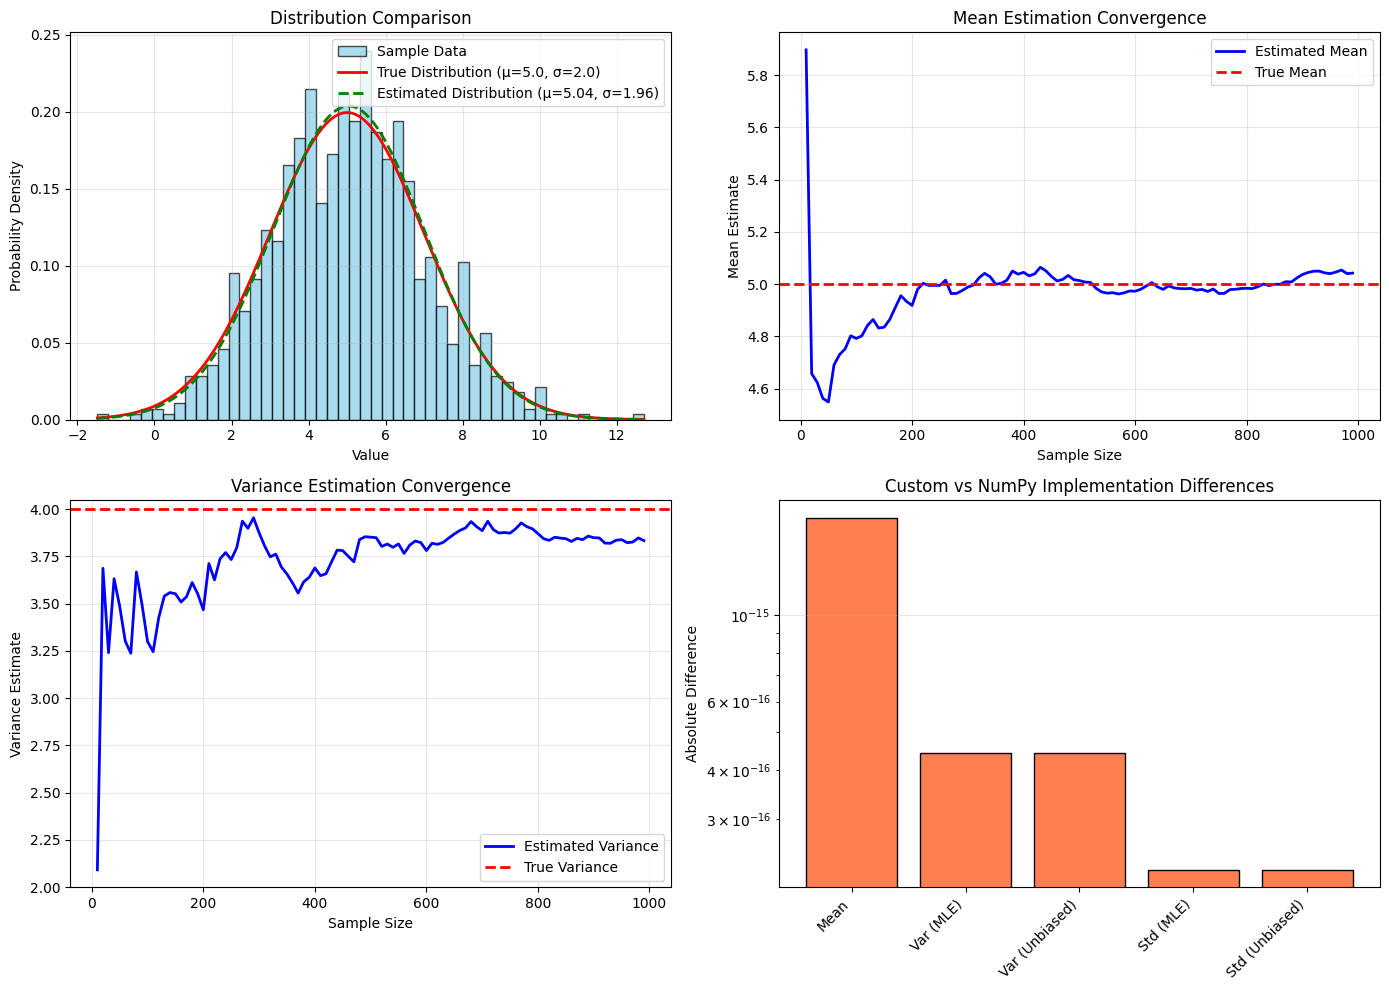


NOTES:
• MLE (ddof=0): Maximum Likelihood Estimator (biased for variance)
• Unbiased (ddof=1): Unbiased estimator (Bessel's correction)
• For large samples, both estimators converge to the true value
• Custom implementation matches NumPy to machine precision


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_mean(data):
    """
    Estimate the mean of a distribution using Maximum Likelihood Estimation.
    For Gaussian distribution: μ = (1/n) * Σ(xi)
    """
    n = len(data)
    return sum(data) / n

def estimate_variance(data, ddof=0):
    """
    Estimate the variance of a distribution.

    Args:
        data: Sample data
        ddof: Delta Degrees of Freedom (0 for MLE, 1 for unbiased estimator)

    For Gaussian distribution: σ² = (1/(n-ddof)) * Σ(xi - μ)²
    """
    n = len(data)
    mean = estimate_mean(data)
    return sum((x - mean)**2 for x in data) / (n - ddof)

def estimate_std(data, ddof=0):
    """
    Estimate the standard deviation.
    """
    return estimate_variance(data, ddof) ** 0.5

# Generate sample data from a known Gaussian distribution
np.random.seed(42)
true_mean = 5.0
true_std = 2.0
sample_size = 1000

# Generate samples
samples = np.random.normal(true_mean, true_std, sample_size)

print("=" * 60)
print("GAUSSIAN DISTRIBUTION PARAMETER ESTIMATION")
print("=" * 60)
print(f"\nTrue Parameters:")
print(f"  Mean (μ): {true_mean}")
print(f"  Std Dev (σ): {true_std}")
print(f"  Variance (σ²): {true_std**2}")
print(f"\nSample Size: {sample_size}")

print("\n" + "-" * 60)
print("CUSTOM IMPLEMENTATION")
print("-" * 60)

# Custom estimates (MLE - Maximum Likelihood Estimator)
custom_mean = estimate_mean(samples)
custom_var_mle = estimate_variance(samples, ddof=0)
custom_std_mle = estimate_std(samples, ddof=0)

# Custom estimates (Unbiased estimator)
custom_var_unbiased = estimate_variance(samples, ddof=1)
custom_std_unbiased = estimate_std(samples, ddof=1)

print(f"\nEstimated Mean: {custom_mean:.6f}")
print(f"  Error: {abs(custom_mean - true_mean):.6f}")

print(f"\nEstimated Variance (MLE, ddof=0): {custom_var_mle:.6f}")
print(f"  Error: {abs(custom_var_mle - true_std**2):.6f}")

print(f"\nEstimated Variance (Unbiased, ddof=1): {custom_var_unbiased:.6f}")
print(f"  Error: {abs(custom_var_unbiased - true_std**2):.6f}")

print(f"\nEstimated Std Dev (MLE, ddof=0): {custom_std_mle:.6f}")
print(f"  Error: {abs(custom_std_mle - true_std):.6f}")

print(f"\nEstimated Std Dev (Unbiased, ddof=1): {custom_std_unbiased:.6f}")
print(f"  Error: {abs(custom_std_unbiased - true_std):.6f}")

print("\n" + "-" * 60)
print("NUMPY IMPLEMENTATION")
print("-" * 60)

# NumPy estimates
numpy_mean = np.mean(samples)
numpy_var_mle = np.var(samples, ddof=0)
numpy_std_mle = np.std(samples, ddof=0)
numpy_var_unbiased = np.var(samples, ddof=1)
numpy_std_unbiased = np.std(samples, ddof=1)

print(f"\nEstimated Mean: {numpy_mean:.6f}")
print(f"  Error: {abs(numpy_mean - true_mean):.6f}")

print(f"\nEstimated Variance (MLE, ddof=0): {numpy_var_mle:.6f}")
print(f"  Error: {abs(numpy_var_mle - true_std**2):.6f}")

print(f"\nEstimated Variance (Unbiased, ddof=1): {numpy_var_unbiased:.6f}")
print(f"  Error: {abs(numpy_var_unbiased - true_std**2):.6f}")

print(f"\nEstimated Std Dev (MLE, ddof=0): {numpy_std_mle:.6f}")
print(f"  Error: {abs(numpy_std_mle - true_std):.6f}")

print(f"\nEstimated Std Dev (Unbiased, ddof=1): {numpy_std_unbiased:.6f}")
print(f"  Error: {abs(numpy_std_unbiased - true_std):.6f}")

print("\n" + "-" * 60)
print("COMPARISON: Custom vs NumPy")
print("-" * 60)

print(f"\nMean difference: {abs(custom_mean - numpy_mean):.10e}")
print(f"Variance (MLE) difference: {abs(custom_var_mle - numpy_var_mle):.10e}")
print(f"Variance (Unbiased) difference: {abs(custom_var_unbiased - numpy_var_unbiased):.10e}")
print(f"Std Dev (MLE) difference: {abs(custom_std_mle - numpy_std_mle):.10e}")
print(f"Std Dev (Unbiased) difference: {abs(custom_std_unbiased - numpy_std_unbiased):.10e}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram with estimated distribution
ax1 = axes[0, 0]
ax1.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Data')
x = np.linspace(samples.min(), samples.max(), 1000)
true_pdf = (1 / (true_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - true_mean) / true_std) ** 2)
estimated_pdf = (1 / (custom_std_unbiased * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - custom_mean) / custom_std_unbiased) ** 2)
ax1.plot(x, true_pdf, 'r-', linewidth=2, label=f'True Distribution (μ={true_mean}, σ={true_std})')
ax1.plot(x, estimated_pdf, 'g--', linewidth=2, label=f'Estimated Distribution (μ={custom_mean:.2f}, σ={custom_std_unbiased:.2f})')
ax1.set_xlabel('Value')
ax1.set_ylabel('Probability Density')
ax1.set_title('Distribution Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Parameter estimation convergence
ax2 = axes[0, 1]
sample_sizes = range(10, len(samples), 10)
mean_estimates = [estimate_mean(samples[:n]) for n in sample_sizes]
ax2.plot(sample_sizes, mean_estimates, 'b-', linewidth=2, label='Estimated Mean')
ax2.axhline(y=true_mean, color='r', linestyle='--', linewidth=2, label='True Mean')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Mean Estimate')
ax2.set_title('Mean Estimation Convergence')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Variance estimation convergence
ax3 = axes[1, 0]
var_estimates = [estimate_variance(samples[:n], ddof=1) for n in sample_sizes]
ax3.plot(sample_sizes, var_estimates, 'b-', linewidth=2, label='Estimated Variance')
ax3.axhline(y=true_std**2, color='r', linestyle='--', linewidth=2, label='True Variance')
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Variance Estimate')
ax3.set_title('Variance Estimation Convergence')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Error comparison
ax4 = axes[1, 1]
errors = {
    'Mean': abs(custom_mean - numpy_mean),
    'Var (MLE)': abs(custom_var_mle - numpy_var_mle),
    'Var (Unbiased)': abs(custom_var_unbiased - numpy_var_unbiased),
    'Std (MLE)': abs(custom_std_mle - numpy_std_mle),
    'Std (Unbiased)': abs(custom_std_unbiased - numpy_std_unbiased)
}
bars = ax4.bar(range(len(errors)), list(errors.values()), color='coral', edgecolor='black')
ax4.set_xticks(range(len(errors)))
ax4.set_xticklabels(list(errors.keys()), rotation=45, ha='right')
ax4.set_ylabel('Absolute Difference')
ax4.set_title('Custom vs NumPy Implementation Differences')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("NOTES:")
print("=" * 60)
print("• MLE (ddof=0): Maximum Likelihood Estimator (biased for variance)")
print("• Unbiased (ddof=1): Unbiased estimator (Bessel's correction)")
print("• For large samples, both estimators converge to the true value")
print("• Custom implementation matches NumPy to machine precision")
print("=" * 60)